In [1]:
!pip install -q kaggle

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [8]:
!chmod 600 /content/kaggle.json

In [9]:
! kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
online-retail-ii-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip online-retail-ii-uci.zip

Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


In [11]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/online_retail_II.csv')

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [18]:
singapore_df = df[df["Country"] == "Singapore"]
singapore_df.head()
# You will see that one invoice have many list of product so
# we have to group one invoice to list of stockcode

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
176270,506142,21358,TOAST ITS - HAPPY BIRTHDAY,12,2010-04-27 16:19:00,1.25,12744.0,Singapore
176271,506142,21356,TOAST ITS - FAIRY FLOWER,12,2010-04-27 16:19:00,1.25,12744.0,Singapore
176272,506142,22485,SET OF 2 WOODEN MARKET CRATES,3,2010-04-27 16:19:00,12.75,12744.0,Singapore
176273,506142,22409,MONEY BOX BISCUITS DESIGN,12,2010-04-27 16:19:00,1.25,12744.0,Singapore
176274,506142,22605,WOODEN CROQUET GARDEN SET,4,2010-04-27 16:19:00,10.95,12744.0,Singapore


In [19]:
transaction_singapore = singapore_df.groupby("Invoice")["StockCode"].apply(list)

In [20]:
transaction_singapore

,StockCode
Invoice,
506142,"[21358, 21356, 22485, 22409, 22605, 21888, 209..."
521402,"[22507, 21667, 21790, 21878, 21917, 22505, 226..."
521403,"[22222, 22423, 21936, 22494, 22294, 85130A, 21..."
521404,"[21651, 22198, 22197, 22666, 22457, 84832, 22642]"
542102,"[21519, 22697, 22699, 22343, 22344, 22345, 223..."
548813,"[M, M, M, M]"
548820,[M]
548968,"[48138, 22365, 22978, 22348, 22979, 22993, 215..."
560360,"[23323, 22343, 22423, 22191, 23341, 22925, 229..."


In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

In [24]:
# Use one hot encodeing
mlb = MultiLabelBinarizer()

transaction_df = pd.DataFrame(mlb.fit_transform(transaction_singapore),
                              columns=mlb.classes_)
transaction_df.set_index(transaction_singapore.index, inplace=True)
transaction_df.head()

,20681,20682,20684,20685,20724,20754,20971,20972,20984,21010,...,84997D,85031C,85048,85071A,85099B,85099F,85123A,85130A,85150,M
Invoice,,,,,,,,,,,,,,,,,,,,,
506142,1,1,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
521402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521403,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,1,0,0
521404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542102,1,1,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0


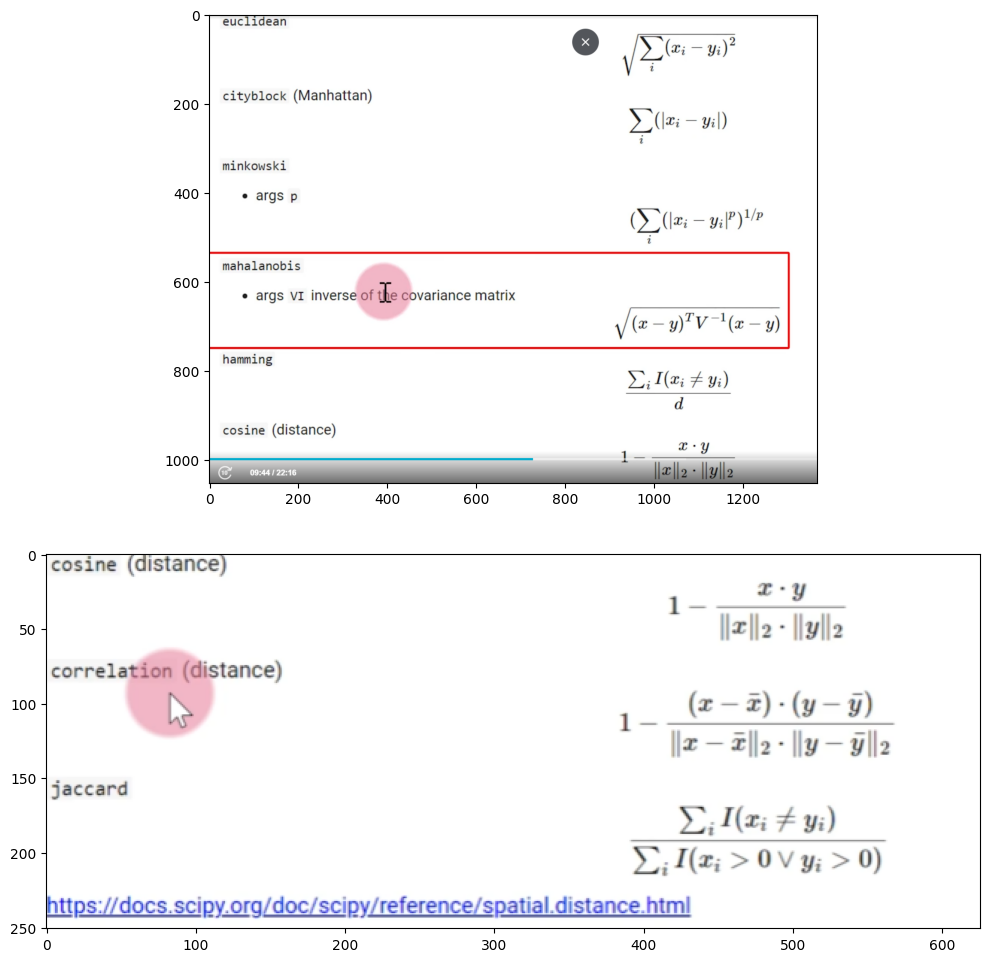

In [28]:
import matplotlib.pyplot as plt
from PIL import Image
img_1 = Image.open('distance_sim_1.png')
img_2 = Image.open('distance_sim_2.png')
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].imshow(img_1)
ax[1].imshow(img_2)
plt.tight_layout()

In [30]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Sample Example

In [32]:
x = np.array([0,3])
y = np.array([4,0])
VI = np.array([[1,0],[0,1]])

In [33]:
X = np.stack([x,y])
X

array([[0, 3],
       [4, 0]])

In [34]:
pdist(X, metric='euclidean')

array([5.])

In [35]:
pdist(X, metric='cityblock')

array([7.])

In [36]:
pdist(X, metric='minkowski', p=1) # Make minikowski to cityblock

array([7.])

In [40]:
pdist(X, metric='minkowski', p=2) # Make minikowski to Euclidean

array([5.])

In [39]:
pdist(X, metric='minkowski', p=3)

array([4.49794145])

In [42]:
pdist(X, metric='mahalanobis', VI=VI)

array([5.])

In [43]:
pdist(X, metric='hamming')

array([1.])

In [44]:
pdist(X, metric='cosine')

array([1.])

In [45]:
pdist(X, metric='correlation')

array([2.])

In [46]:
pdist(X, metric='jaccard')

array([1.])

# Try with our data

In [47]:
print(squareform(
    pdist(transaction_df, metric='cityblock')
))

[[  0.  52.  82.  43.  66.  37.  37.  70.  99.  56.  37.  37.  37.  37.]
 [ 52.   0.  72.  23.  60.  17.  17.  66.  89.  48.  17.  17.  17.  17.]
 [ 82.  72.   0.  65.  98.  59.  59. 100. 121.  86.  59.  59.  59.  59.]
 [ 43.  23.  65.   0.  61.   8.   8.  57.  80.  37.   8.   8.   8.   8.]
 [ 66.  60.  98.  61.   0.  57.  57.  82. 121.  72.  57.  57.  57.  57.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 70.  66. 100.  57.  82.  53.  53.   0. 119.  64.  53.  53.  53.  53.]
 [ 99.  89. 121.  80. 121.  76.  76. 119.   0.  95.  76.  76.  76.  76.]
 [ 56.  48.  86.  37.  72.  33.  33.  64.  95.   0.  33.  33.  33.  33.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.

In [49]:
print(squareform(
    pdist(transaction_df, metric='minkowski',p=1)
))

[[  0.  52.  82.  43.  66.  37.  37.  70.  99.  56.  37.  37.  37.  37.]
 [ 52.   0.  72.  23.  60.  17.  17.  66.  89.  48.  17.  17.  17.  17.]
 [ 82.  72.   0.  65.  98.  59.  59. 100. 121.  86.  59.  59.  59.  59.]
 [ 43.  23.  65.   0.  61.   8.   8.  57.  80.  37.   8.   8.   8.   8.]
 [ 66.  60.  98.  61.   0.  57.  57.  82. 121.  72.  57.  57.  57.  57.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 70.  66. 100.  57.  82.  53.  53.   0. 119.  64.  53.  53.  53.  53.]
 [ 99.  89. 121.  80. 121.  76.  76. 119.   0.  95.  76.  76.  76.  76.]
 [ 56.  48.  86.  37.  72.  33.  33.  64.  95.   0.  33.  33.  33.  33.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.   0.   0.   0.   0.]
 [ 37.  17.  59.   8.  57.   0.   0.  53.  76.  33.

In [48]:
print(squareform(
    pdist(transaction_df, metric='euclidean')
))

[[ 0.          7.21110255  9.05538514  6.55743852  8.1240384   6.08276253
   6.08276253  8.36660027  9.94987437  7.48331477  6.08276253  6.08276253
   6.08276253  6.08276253]
 [ 7.21110255  0.          8.48528137  4.79583152  7.74596669  4.12310563
   4.12310563  8.1240384   9.43398113  6.92820323  4.12310563  4.12310563
   4.12310563  4.12310563]
 [ 9.05538514  8.48528137  0.          8.06225775  9.89949494  7.68114575
   7.68114575 10.         11.          9.2736185   7.68114575  7.68114575
   7.68114575  7.68114575]
 [ 6.55743852  4.79583152  8.06225775  0.          7.81024968  2.82842712
   2.82842712  7.54983444  8.94427191  6.08276253  2.82842712  2.82842712
   2.82842712  2.82842712]
 [ 8.1240384   7.74596669  9.89949494  7.81024968  0.          7.54983444
   7.54983444  9.05538514 11.          8.48528137  7.54983444  7.54983444
   7.54983444  7.54983444]
 [ 6.08276253  4.12310563  7.68114575  2.82842712  7.54983444  0.
   0.          7.28010989  8.71779789  5.74456265  0.      

In [50]:
print(squareform(
    pdist(transaction_df, metric='minkowski',p=2)
))

[[ 0.          7.21110255  9.05538514  6.55743852  8.1240384   6.08276253
   6.08276253  8.36660027  9.94987437  7.48331477  6.08276253  6.08276253
   6.08276253  6.08276253]
 [ 7.21110255  0.          8.48528137  4.79583152  7.74596669  4.12310563
   4.12310563  8.1240384   9.43398113  6.92820323  4.12310563  4.12310563
   4.12310563  4.12310563]
 [ 9.05538514  8.48528137  0.          8.06225775  9.89949494  7.68114575
   7.68114575 10.         11.          9.2736185   7.68114575  7.68114575
   7.68114575  7.68114575]
 [ 6.55743852  4.79583152  8.06225775  0.          7.81024968  2.82842712
   2.82842712  7.54983444  8.94427191  6.08276253  2.82842712  2.82842712
   2.82842712  2.82842712]
 [ 8.1240384   7.74596669  9.89949494  7.81024968  0.          7.54983444
   7.54983444  9.05538514 11.          8.48528137  7.54983444  7.54983444
   7.54983444  7.54983444]
 [ 6.08276253  4.12310563  7.68114575  2.82842712  7.54983444  0.
   0.          7.28010989  8.71779789  5.74456265  0.      

In [51]:
print(squareform(
    pdist(transaction_df, metric='hamming')
))

[[0.         0.2122449  0.33469388 0.1755102  0.26938776 0.15102041
  0.15102041 0.28571429 0.40408163 0.22857143 0.15102041 0.15102041
  0.15102041 0.15102041]
 [0.2122449  0.         0.29387755 0.09387755 0.24489796 0.06938776
  0.06938776 0.26938776 0.36326531 0.19591837 0.06938776 0.06938776
  0.06938776 0.06938776]
 [0.33469388 0.29387755 0.         0.26530612 0.4        0.24081633
  0.24081633 0.40816327 0.49387755 0.35102041 0.24081633 0.24081633
  0.24081633 0.24081633]
 [0.1755102  0.09387755 0.26530612 0.         0.24897959 0.03265306
  0.03265306 0.23265306 0.32653061 0.15102041 0.03265306 0.03265306
  0.03265306 0.03265306]
 [0.26938776 0.24489796 0.4        0.24897959 0.         0.23265306
  0.23265306 0.33469388 0.49387755 0.29387755 0.23265306 0.23265306
  0.23265306 0.23265306]
 [0.15102041 0.06938776 0.24081633 0.03265306 0.23265306 0.
  0.         0.21632653 0.31020408 0.13469388 0.         0.
  0.         0.        ]
 [0.15102041 0.06938776 0.24081633 0.03265306 0.23

In [52]:
print(squareform(
    pdist(transaction_df, metric='cosine')
))

[[0.         1.         0.86869357 1.         0.71046699 1.
  1.         0.79198743 0.88452995 0.8232233  1.         1.
  1.         1.        ]
 [1.         0.         0.96717339 1.         0.79955407 1.
  1.         0.96533124 0.97113249 1.         1.         1.
  1.         1.        ]
 [0.86869357 0.96717339 0.         1.         0.85962752 1.
  1.         0.90895537 0.90902823 0.95357617 1.         1.
  1.         1.        ]
 [1.         1.         1.         0.         0.94949237 1.
  1.         0.94758576 0.95635642 0.93318469 1.         1.
  1.         1.        ]
 [0.71046699 0.79955407 0.85962752 0.94949237 0.         1.
  1.         0.75909397 0.92284833 0.81101776 1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         0.
  0.         1.         1.         1.         0.         0.
  0.         0.        ]
 [1.         1.         1.         1.         1.         0.
  0.         1.         1.         1.         0.         0.
  0.      

In [53]:
print(squareform(
    pdist(transaction_df, metric='correlation')
))

[[0.         1.10970347 1.06841153 1.07117683 0.86900184 1.02656949
  1.02656949 0.96167876 1.12558149 0.95559438 1.02656949 1.02656949
  1.02656949 1.02656949]
 [1.10970347 0.         1.10834482 1.04533178 0.90782583 1.01692183
  1.01692183 1.09680104 1.13972385 1.10245365 1.01692183 1.01692183
  1.01692183 1.01692183]
 [1.06841153 1.10834482 0.         1.09551108 1.1202143  1.03565318
  1.03565318 1.17166449 1.24490779 1.15887337 1.03565318 1.03565318
  1.03565318 1.03565318]
 [1.07117683 1.04533178 1.09551108 0.         1.035007   1.01097907
  1.01097907 1.02910242 1.06075268 0.99376815 1.01097907 1.01097907
  1.01097907 1.01097907]
 [0.86900184 0.90782583 1.1202143  1.035007   0.         1.03484722
  1.03484722 0.9735115  1.25609846 0.98022031 1.03484722 1.03484722
  1.03484722 1.03484722]
 [1.02656949 1.01692183 1.03565318 1.01097907 1.03484722 0.
  0.         1.03322983 1.04252176 1.02481363 0.         0.
  0.         0.        ]
 [1.02656949 1.01692183 1.03565318 1.01097907 1.03

In [54]:
print(squareform(
    pdist(transaction_df, metric='jaccard')
))

[[0.         1.         0.93181818 1.         0.83544304 1.
  1.         0.88607595 0.94285714 0.90322581 1.         1.
  1.         1.        ]
 [1.         0.         0.98630137 1.         0.90909091 1.
  1.         0.98507463 0.98888889 1.         1.         1.
  1.         1.        ]
 [0.93181818 0.98630137 0.         1.         0.9245283  1.
  1.         0.95238095 0.95275591 0.97727273 1.         1.
  1.         1.        ]
 [1.         1.         1.         0.         0.98387097 1.
  1.         0.98275862 0.98765432 0.97368421 1.         1.
  1.         1.        ]
 [0.83544304 0.90909091 0.9245283  0.98387097 0.         1.
  1.         0.86315789 0.96031746 0.9        1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         0.
  0.         1.         1.         1.         0.         0.
  0.         0.        ]
 [1.         1.         1.         1.         1.         0.
  0.         1.         1.         1.         0.         0.
  0.      

**How to choose**
If data be nominal feature, should choose metric which not interested in continuous of data such as "Hamming", "Jaccard", "Minkowski" with p =1 , cityblock